# Exercises

Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

In [2]:
#import libraries modules credentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from env import host, user, password

In [3]:
# need code to get database loaded into data frame. find db first with workbench/web 
# grab url for credentials, , write sql query, assign query to df

def get_db_url(host, user, password, database):
    """
    Doctstring
    """
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

url_iris  = get_db_url(host, user, password, 'iris_db')


In [4]:
# sql query
# database iris_db has two tables: measurements, and species
# need to view and join tables 
sql_iris = """
SELECT * 
FROM measurements
JOIN species
USING (species_id);
"""

In [5]:
# assign results of query to the 
df_iris = pd.read_sql(sql_iris, url_iris)

In [6]:
df_iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


Use the iris database to answer the following quesitons:

What does the distribution of petal lengths look like?

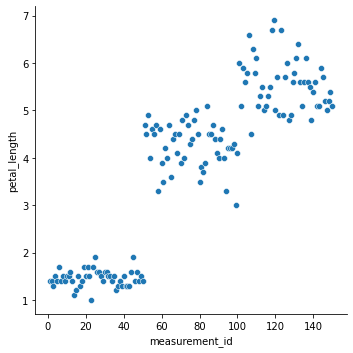

In [7]:
sns.relplot(data=df_iris, x='measurement_id', y='petal_length')

Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

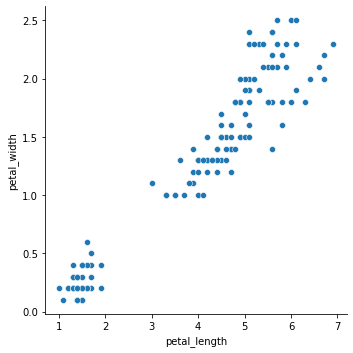

In [8]:
# hint = use a scatter plot

sns.relplot(data=df_iris, x='petal_length', y='petal_width') 

Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

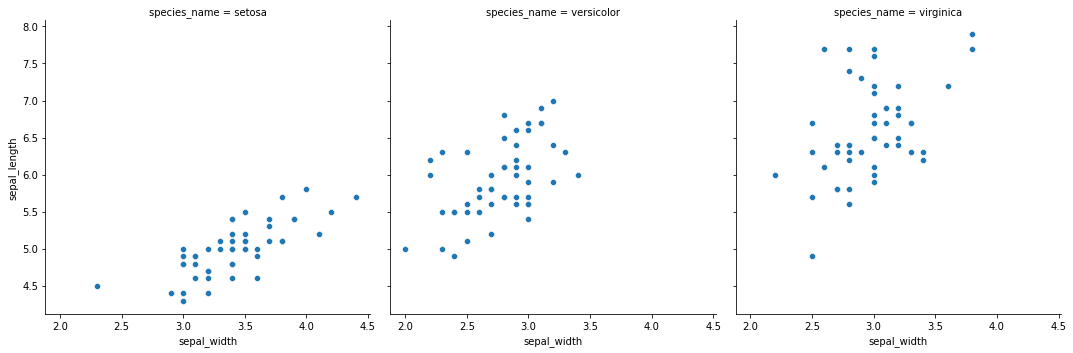

In [9]:
# use a scatter plot that tracks sepal_length vs sepal_width
# then use the col='species' in order to seperate data via species

sns.relplot(data=df_iris, x='sepal_width', y='sepal_length', col='species_name')

Which features would be best used to predict species? 
 - Petal would be best, as it is more tightly clustered among different species
 - Also *appears* to have higher R

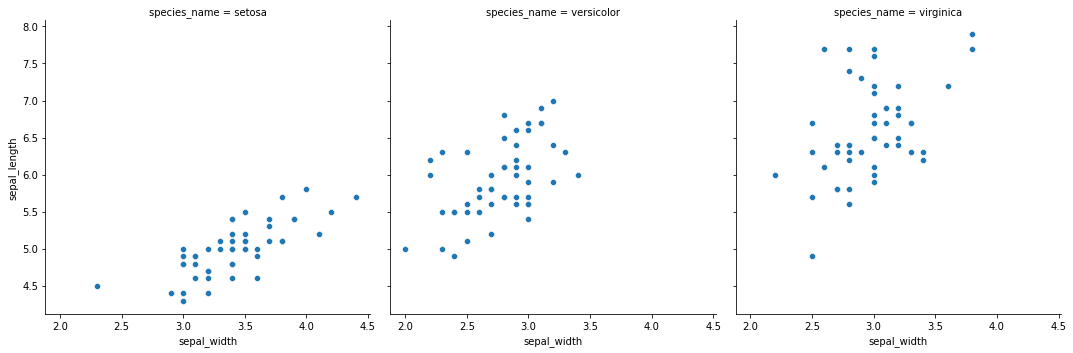

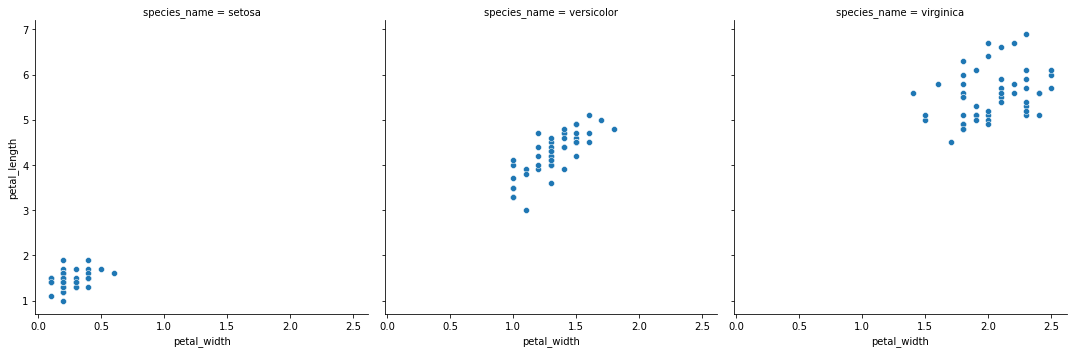

In [10]:
sns.relplot(data=df_iris, x='sepal_width', y='sepal_length', col='species_name')
sns.relplot(data=df_iris, x='petal_width', y='petal_length', col='species_name')

Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 

In [11]:
anscombe = sns.load_dataset('anscombe')

In [12]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [13]:
type(anscombe) # --> pandas dataFrame


pandas.core.frame.DataFrame

Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [14]:
anscombe.groupby(by='dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

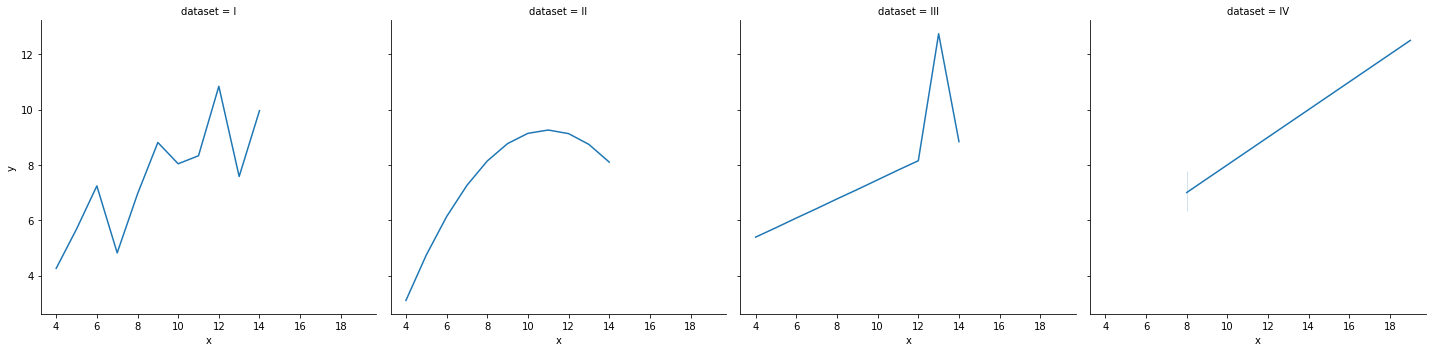

In [29]:
sns.relplot(kind='line', data=anscombe, x='x' , y='y', col='dataset')

Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [33]:
#InsectSpray is in the pydataset module. 
from pydataset import data

In [37]:
# assign to variable and show (read) the documentation
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [38]:
insect_spray = data('InsectSprays')

In [42]:
insect_spray.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [43]:
insect_spray.groupby(by='spray').describe()

count                                                    
      count       mean       std  min    25%   50%    75%   max
spray                                                          
A      12.0  14.500000  4.719399  7.0  11.50  14.0  17.75  23.0
B      12.0  15.333333  4.271115  7.0  12.50  16.5  17.50  21.0
C      12.0   2.083333  1.975225  0.0   1.00   1.5   3.00   7.0
D      12.0   4.916667  2.503028  2.0   3.75   5.0   5.00  12.0
E      12.0   3.500000  1.732051  1.0   2.75   3.0   5.00   6.0
F      12.0  16.666667  6.213378  9.0  12.50  15.0  22.50  26.0

<AxesSubplot:xlabel='spray', ylabel='count'>

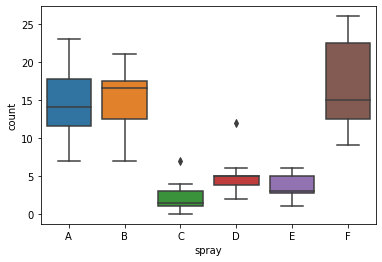

In [41]:
sns.boxplot(data=insect_spray, x='spray', y='count')

Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn.

In [47]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [48]:
swiss_df = data('swiss')

In [50]:
swiss_df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


Create visualizations to answer the following questions:

Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [53]:
swiss_df[swiss_df['Catholic'] > 50] # do quick logic test

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4
Veveyse,87.1,64.5,14,6,98.61,24.5
Conthey,75.5,85.9,3,2,99.71,15.1
Entremont,69.3,84.9,7,6,99.68,19.8


In [59]:
swiss_df['is_catholic'] = np.where(swiss_df['Catholic'] > 50, True, False)

In [60]:
swiss_df.head(5)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


Does whether or not a province is Catholic influence fertility?

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

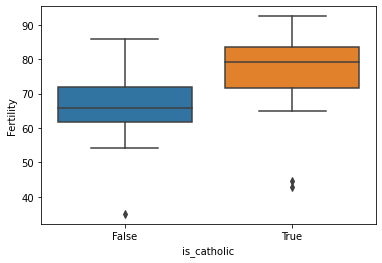

In [62]:
sns.boxplot(data=swiss_df, x='is_catholic', y='Fertility')

What measure correlates most strongly with fertility?

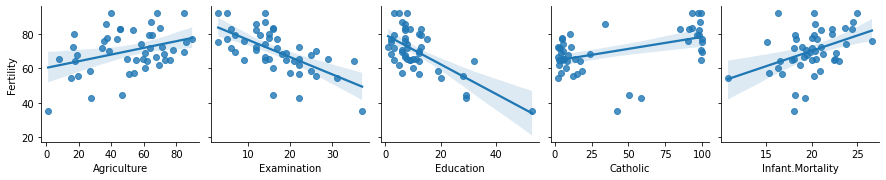

In [73]:
sns.pairplot(data=swiss_df, kind='reg', y_vars='Fertility', x_vars=['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality'])

Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [75]:
#grab url,
chipotle_url = get_db_url(host, user, password, 'chipotle')

In [76]:
chipotle_sql = """
SELECT *
FROM orders
"""

In [98]:
chipotle_df = pd.read_sql(chipotle_sql, chipotle_url)

In [99]:
chipotle_df.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [148]:
chipotle_df['item_price'] = chipotle_df.item_price.str.strip('$').astype(float)

AttributeError: Can only use .str accessor with string values!

In [205]:
top_four = chipotle_df.groupby('item_name', as_index=False)['quantity', 'item_price'].sum().nlargest(4, columns='quantity')

/var/folders/x7/9w9mh0fd73zg4jr8l_9v9h840000gn/T/ipykernel_3560/4277695682.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_four = chipotle_df.groupby('item_name', as_index=False)['quantity', 'item_price'].sum().nlargest(4, columns='quantity')


In [206]:
top_four.drop(columns='quantity', inplace=True)

In [168]:
#top_four.rename(columns={'item_price': 'revenue'}, inplace=True)

Text(0, 0.5, 'Revenue')

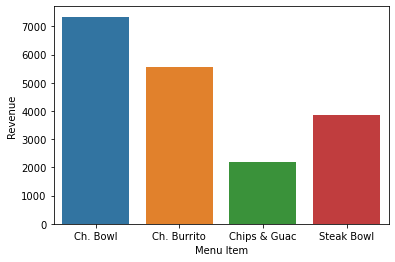

In [208]:
top_four_chart = sns.barplot(data=top_four, x='item_name', y='item_price')
top_four_chart.set_xticklabels(['Ch. Bowl', 'Ch. Burrito', 'Chips & Guac', 'Steak Bowl'])
top_four_chart.set_xlabel('Menu Item')
top_four_chart.set_ylabel('Revenue')

Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.